<a href="https://colab.research.google.com/github/MahdiNouraie/RNN-and-Transformers/blob/main/Temporal_Convolutional_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyyaml==5.4.1

In [ ]:
!pip install darts

In [ ]:
!pip uninstall matplotlib

In [ ]:
pip install matplotlib==3.1.3

In [ ]:
import darts
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from darts.datasets import AirPassengersDataset
from darts.dataprocessing.transformers import Scaler
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.metrics import mae, mape
import darts.utils.timeseries_generation as tg
from darts.models import RNNModel
from darts.utils.likelihood_models import GaussianLikelihood

In [7]:
signal_length = 400
signal_trend = tg.linear_timeseries(length = signal_length , end_value = 4)

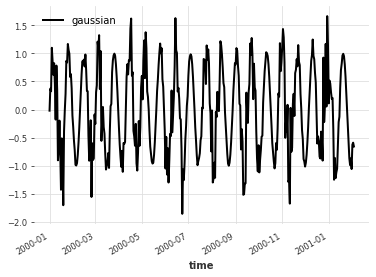

In [8]:
signal_length = 400
signal_trend = tg.linear_timeseries(length = signal_length , end_value = 4)
sine_signal = tg.sine_timeseries(length = signal_length , 
                     value_frequency = 0.05,
                     value_amplitude = 1.0)
noise = tg.gaussian_timeseries(length = signal_length , std = 0.5)
noise_sine =(tg.sine_timeseries(length = signal_length , value_frequency=0.02) +
                  tg.constant_timeseries(length = signal_length , value = 1)) / 2
noise = noise * noise_sine
target_series = sum([noise , sine_signal])
target_series.plot()

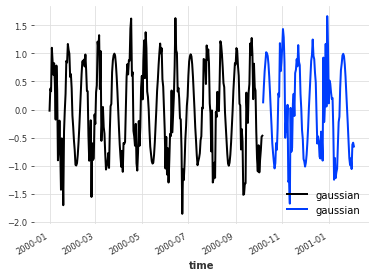

In [9]:
target_train, target_val = target_series.split_after(0.7)
target_train.plot()
target_val.plot()

In [10]:
from darts.models import TCNModel

In [11]:
from darts.utils import likelihood_models
tcn_model = TCNModel(
    input_chunk_length = 30,
    output_chunk_length = 15,
    kernel_size = 3,
    num_filters = 3,
    dilation_base = 2,
    dropout = 0.1,
    likelihood = GaussianLikelihood()
)

In [12]:
tcn_model.fit(target_train)

2022-06-30 11:48:30 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 236 samples.
2022-06-30 11:48:31 darts.models.forecasting.tcn_model INFO: Number of layers chosen: 4
2022-06-30 11:48:31 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-06-30 11:48:31 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: False
2022-06-30 11:48:31 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-30 11:48:31 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-30 11:48:31 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/trainer.py:1817: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  category=PossibleUserWarning,
2022-06-30 11:48:31 pyto

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

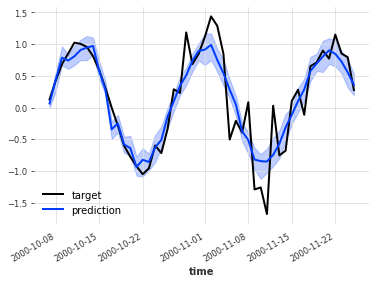

In [13]:
pred = tcn_model.predict(50 , num_samples = 50)
target_val.slice_intersect(pred).plot(label = 'target')
pred.plot(label = 'prediction' , low_quantile= 0.1 , high_quantile = 0.9)